# NAME: PREETI KOKATE



# TASK 6: Prediction using Decision Tree Algorithm   #The Spark Foundation

# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.metrics as sm
from sklearn.datasets import load_iris
import sklearn.datasets as datasets

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Loading the dataset

In [2]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data,columns=iris.feature_names)
data["Species"] = iris["target"]
data["Species"] = data["Species"].apply(lambda x:iris["target_names"][x])
data.head() #First five values of dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.tail() #Last five values of dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [4]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()  #Statistical properties of dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.shape #Shape of the data

(150, 5)

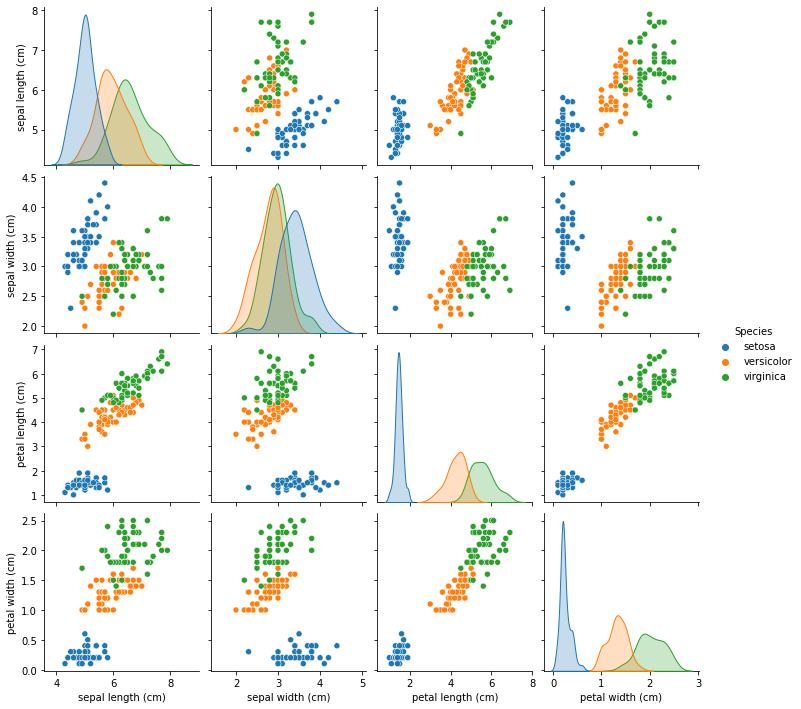

In [9]:
sns.pairplot(data,hue="Species")   #Pairplot


In [10]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [11]:
X.shape

(150, 4)

# Visualization

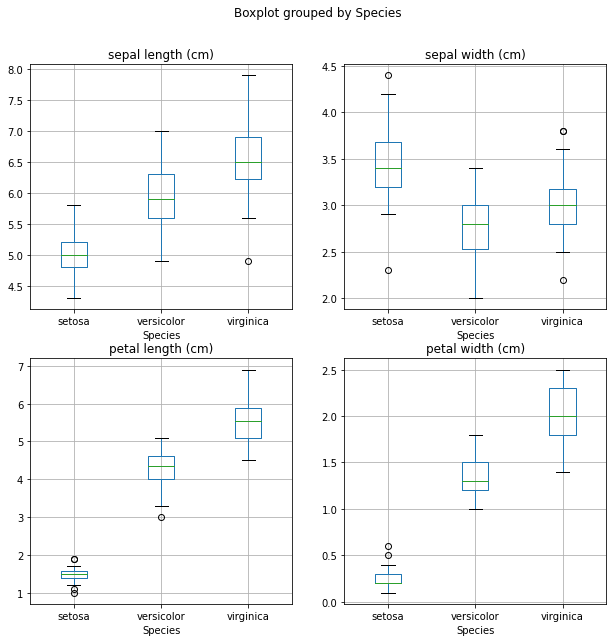

In [12]:
fig, axes = plt.subplots(2,2) 
fig.set_figheight(10)
fig.set_figwidth(10)

for i,col in enumerate(list(data.columns.values)[:-1]):
    a = data.boxplot(col, by="Species", ax=axes.flatten()[i])

plt.show()

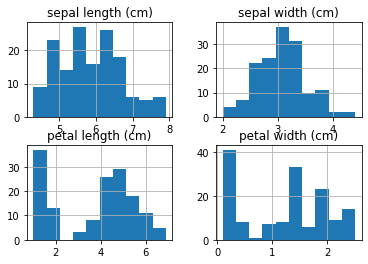

In [13]:
data.hist()
plt.show()  #Histogram of each feature


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


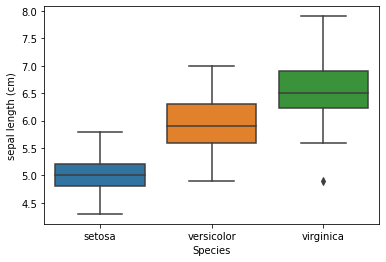

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


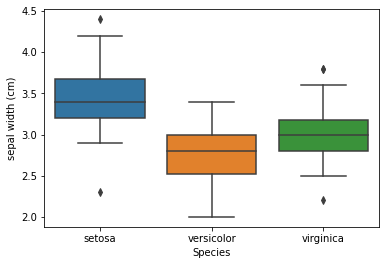

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


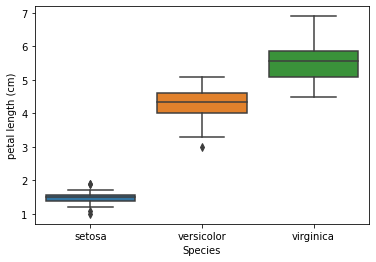

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


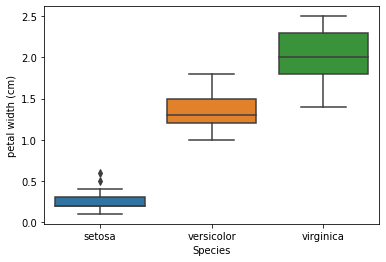

In [14]:
for col in data.columns:
    if data[col].dtypes != "object":
        sns.boxplot(data['Species'],data[col])     #Hence the features with Species has linear realtionship
        plt.show()  #Box plot betwwen features Vs Species

                   sepal length (cm)  ...  petal width (cm)
sepal length (cm)           1.000000  ...          0.817941
sepal width (cm)           -0.117570  ...         -0.366126
petal length (cm)           0.871754  ...          0.962865
petal width (cm)            0.817941  ...          1.000000

[4 rows x 4 columns]


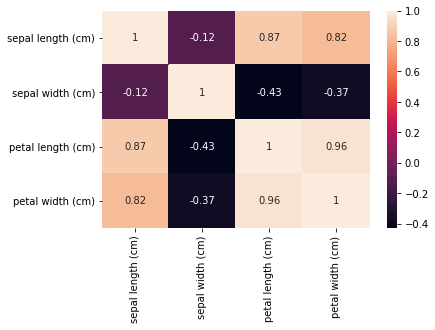

In [15]:

print(data.corr())
sns.heatmap(data.corr(), annot = True)  #Correlation function

# Decision Tree Classification 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2) 
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)
print("Training Complete.")
y_pred = tree_classifier.predict(X_test)

Training Complete.


In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
6,setosa,setosa
3,setosa,setosa
113,virginica,virginica
12,setosa,setosa
24,setosa,setosa
129,virginica,versicolor
25,setosa,setosa
108,virginica,virginica
128,virginica,virginica
45,setosa,setosa


#Visualize the Decision Tree Classifier graph

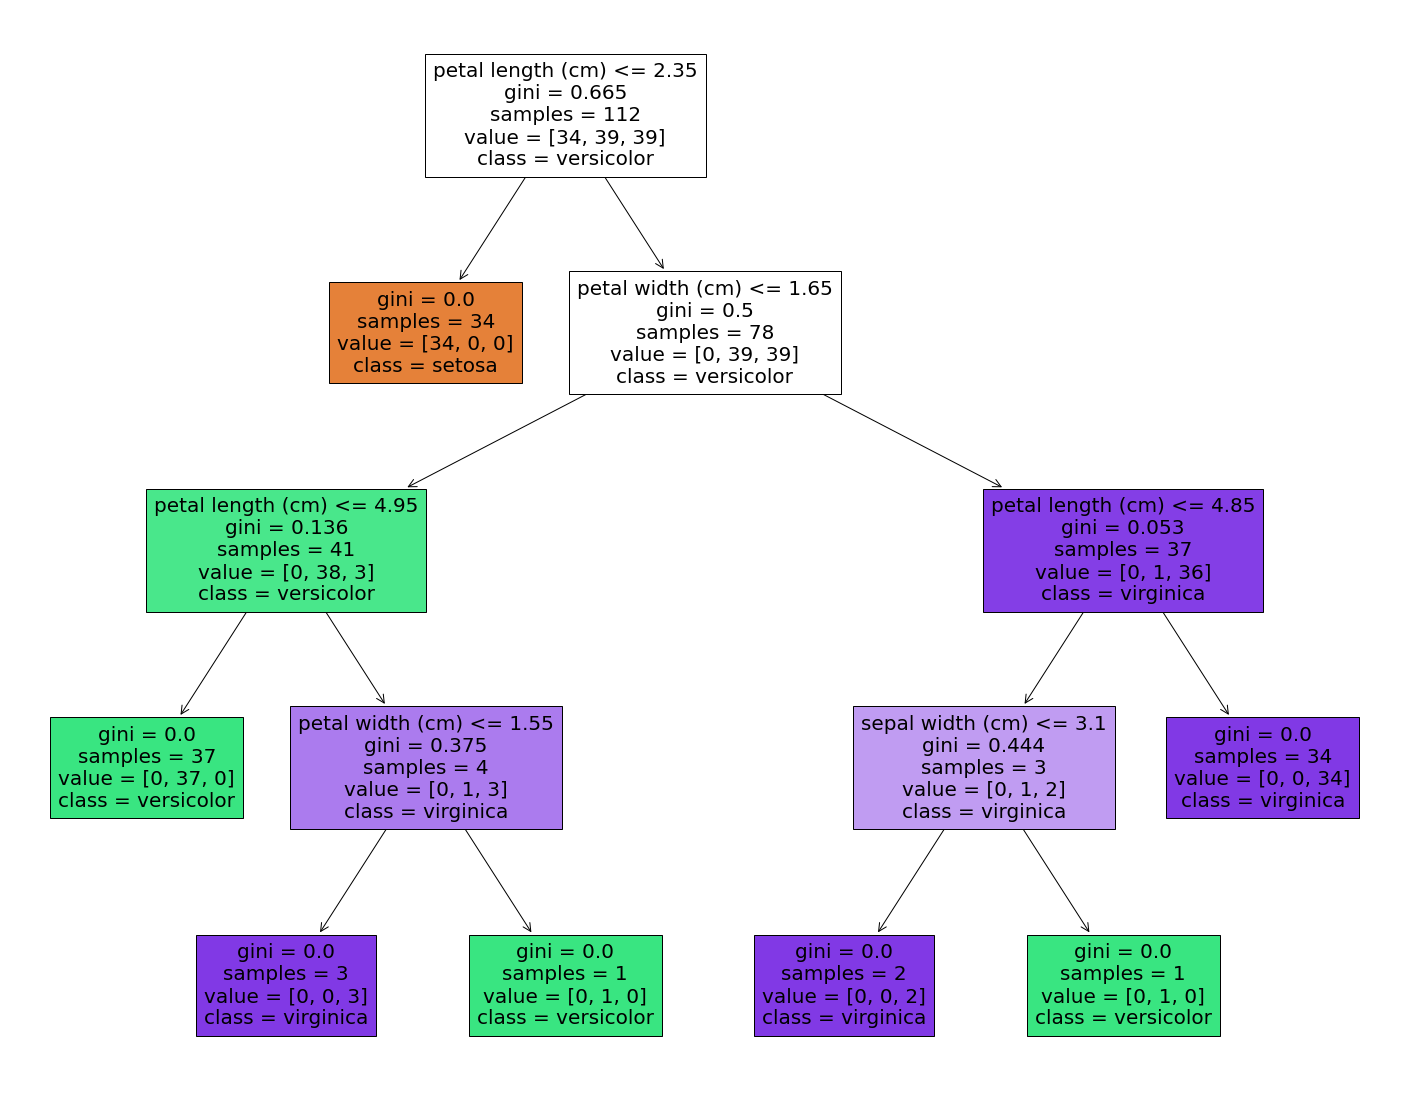

In [18]:
       
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_classifier, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)


# Calculating The Model Accuracy

In [19]:
print("Accuracy:",sm.accuracy_score(y_test, y_pred))


Accuracy: 0.9473684210526315


Here, we got our model accuracy almost 95% so we can deploy it.

Conclusion: **Decision Tree** allow us to analyze fully possible consequences of a **decision**.

**THANK YOU!**